## 1. Chargement des librairies et paramètres

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style='whitegrid', palette='muted')
%matplotlib inline


## 2. Chargement des données

> **Remarque sur l'exclusion de certains fichiers :**
>
> Deux fichiers présents dans le dossier ne sont **pas inclus dans l'EDA ni la préparation des données** :
>
> - `HomeCredit_columns_description.csv` : Ce fichier contient uniquement la description (glossaire) des variables du projet. Il n'apporte aucune donnée métier exploitable pour la création de features ou l'entraînement des modèles. Il sert uniquement de documentation pour comprendre le sens des colonnes.
>
> - `sample_submission.csv` : Ce fichier correspond à un exemple du format attendu pour la soumission finale des prédictions. Il ne contient aucune donnée d'entraînement ou d'information client utile pour l'analyse ou la modélisation. Il sera utilisé uniquement à l'étape finale pour formater les résultats du modèle avant envoi.
>
> **Conclusion :**  
> Seuls les fichiers de données métier (`application_train.csv`, `application_test.csv`, `bureau.csv`, `bureau_balance.csv`, `credit_card_balance.csv`, `installments_payments.csv`, `POS_CASH_balance.csv`, `previous_application.csv`) sont chargés et analysés pour l'EDA et la préparation des features.


In [4]:
DATA_DIR = '/Users/delatouf/P07_implementer_un_modele_de_scoring/data'

csv_files = [
    'application_train.csv', 'application_test.csv', 'bureau.csv', 'bureau_balance.csv',
    'credit_card_balance.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv'
]

dfs = {}
for file in csv_files:
    path = os.path.join(DATA_DIR, file)
    if os.path.exists(path):
        dfs[file.replace('.csv','')] = pd.read_csv(path)
        print(f"{file} chargé : {dfs[file.replace('.csv','')].shape[0]} lignes, {dfs[file.replace('.csv','')].shape[1]} colonnes")
    else:
        print(f"ATTENTION : {file} non trouvé dans {DATA_DIR}")

# On travaille principalement sur application_train
train = dfs['application_train']


application_train.csv chargé : 307511 lignes, 122 colonnes
application_test.csv chargé : 48744 lignes, 121 colonnes
bureau.csv chargé : 1716428 lignes, 17 colonnes
bureau_balance.csv chargé : 27299925 lignes, 3 colonnes
credit_card_balance.csv chargé : 3840312 lignes, 23 colonnes
installments_payments.csv chargé : 13605401 lignes, 8 colonnes
POS_CASH_balance.csv chargé : 10001358 lignes, 8 colonnes
previous_application.csv chargé : 1670214 lignes, 37 colonnes


## 3. Aperçu rapide du dataset principal

In [5]:
print(train.shape)
display(train.head())
display(train.info())
display(train.describe())


(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


None

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## 4. Analyse exploratoire (EDA)

### Statistiques descriptives

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


### Analyse de la variable cible (TARGET)

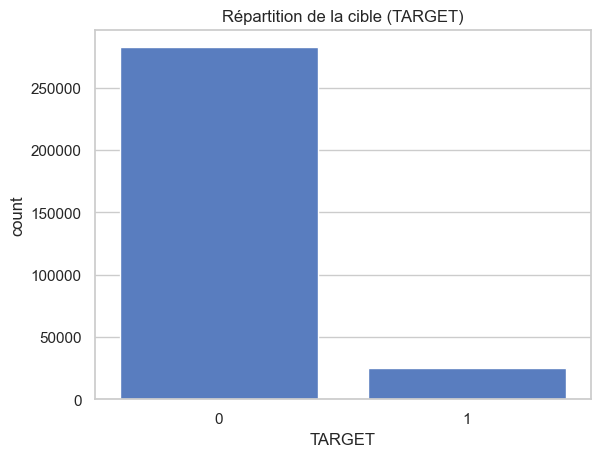

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


In [7]:
target_col = 'TARGET'
sns.countplot(x=target_col, data=train)
plt.title('Répartition de la cible (TARGET)')
plt.show()
print(train[target_col].value_counts(normalize=True))


### Distribution de features importantes

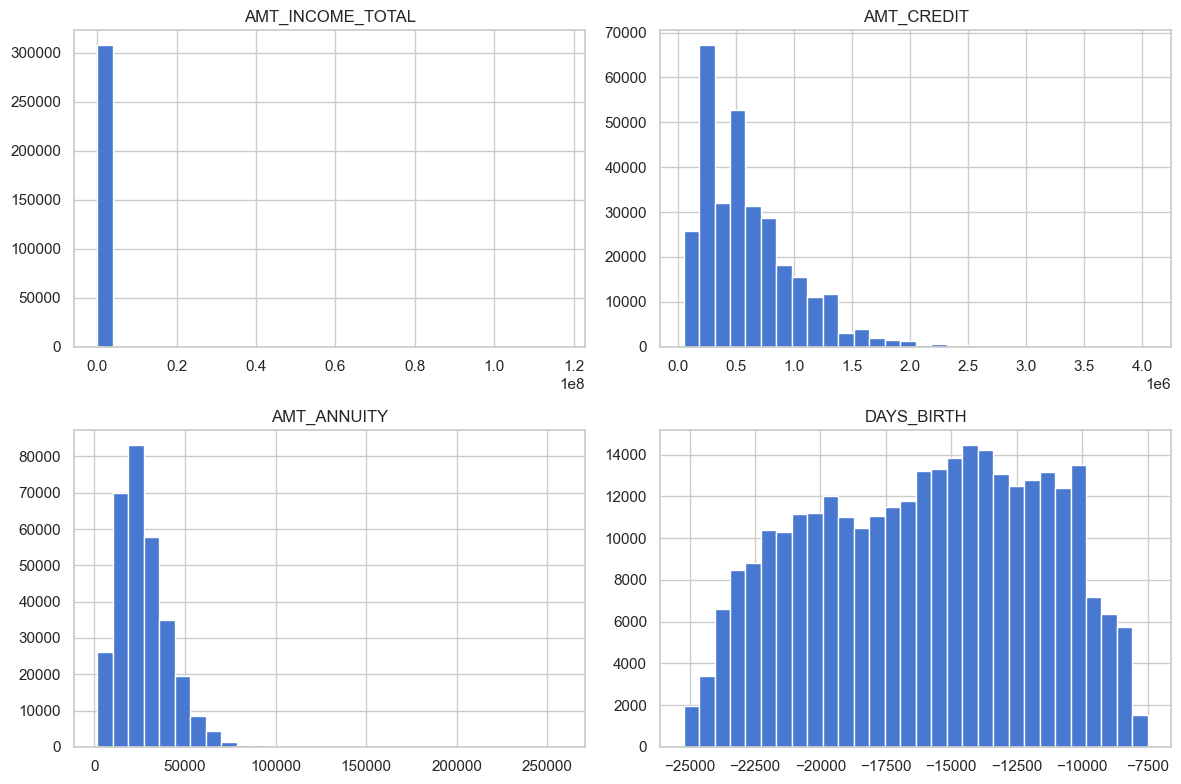

In [8]:
features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH']
train[features].hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()


### Corrélation avec la cible et entre features

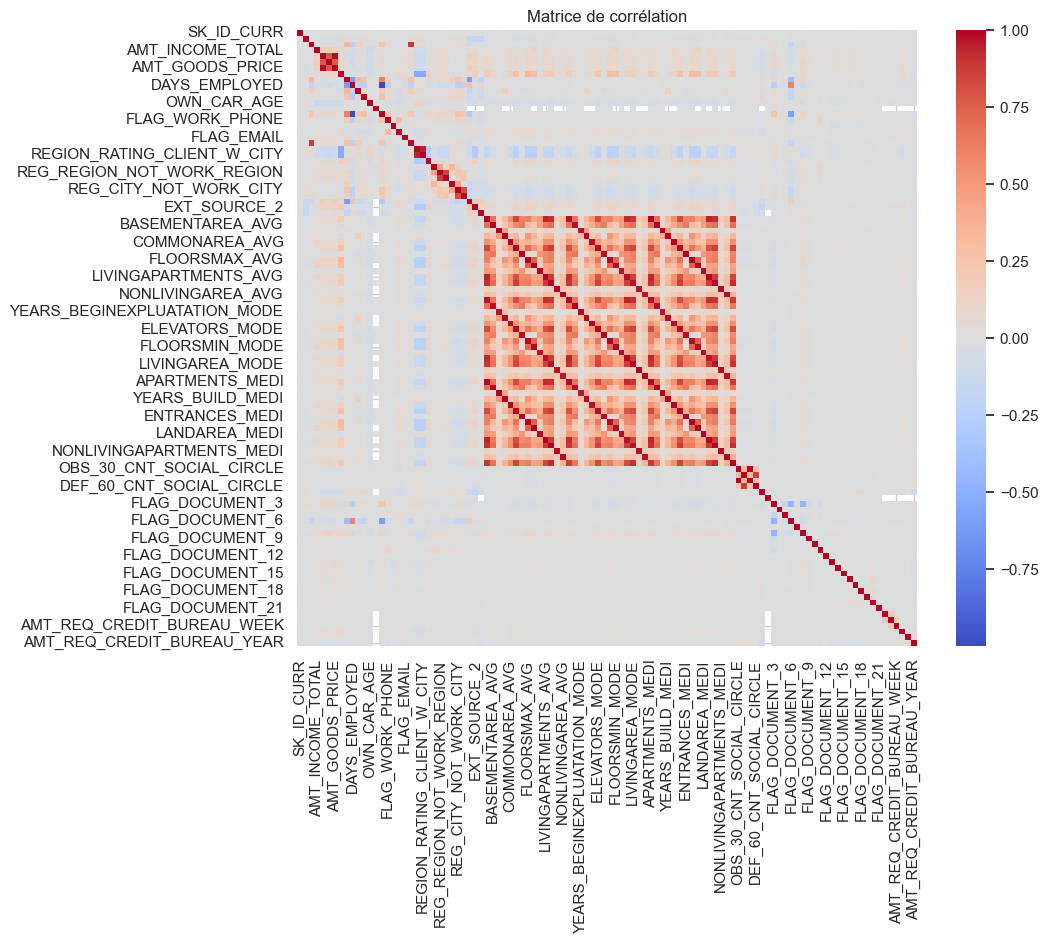

Corrélation avec la cible :


DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
                                 ...   
FLOORSMAX_AVG                 -0.044003
DAYS_EMPLOYED                 -0.044932
EXT_SOURCE_1                  -0.155317
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_3                  -0.178919
Name: TARGET, Length: 105, dtype: float64

In [9]:
# Calcul de la matrice de corrélation uniquement sur les colonnes numériques
num_cols = train.select_dtypes(include=['number'])

corr = num_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation")
plt.show()

# Corrélation avec la cible (si la cible est bien dans le DataFrame)
if 'TARGET' in num_cols.columns:
    corr_target = corr['TARGET'].drop('TARGET').sort_values(ascending=False)
    print("Corrélation avec la cible :")
    display(corr_target)
else:
    print("La colonne TARGET n'est pas numérique ou n'existe pas dans le DataFrame filtré.")


## 5. Analyse des valeurs manquantes

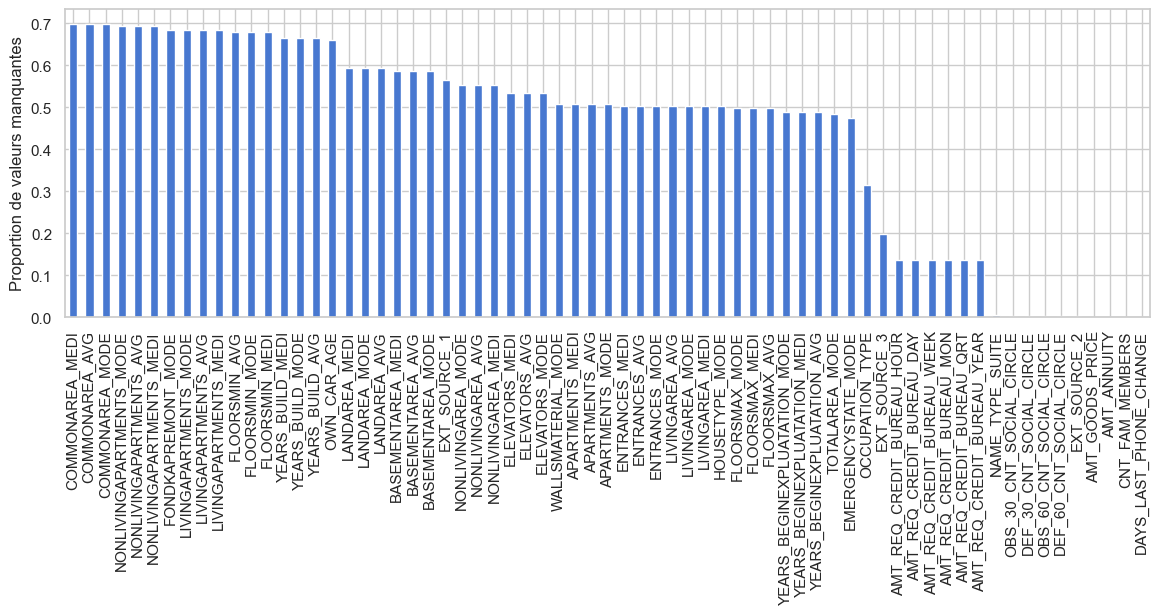

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
                              ...   
EXT_SOURCE_2                0.002146
AMT_GOODS_PRICE             0.000904
AMT_ANNUITY                 0.000039
CNT_FAM_MEMBERS             0.000007
DAYS_LAST_PHONE_CHANGE      0.000003
Length: 67, dtype: float64


In [10]:
missing = train.isnull().mean().sort_values(ascending=False)
missing[missing > 0].plot(kind='bar', figsize=(14,4))
plt.ylabel('Proportion de valeurs manquantes')
plt.show()

print(missing[missing > 0])


## 6. Analyse et traitement des outliers

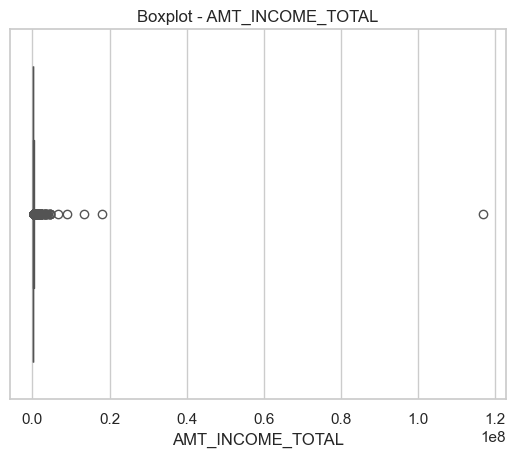

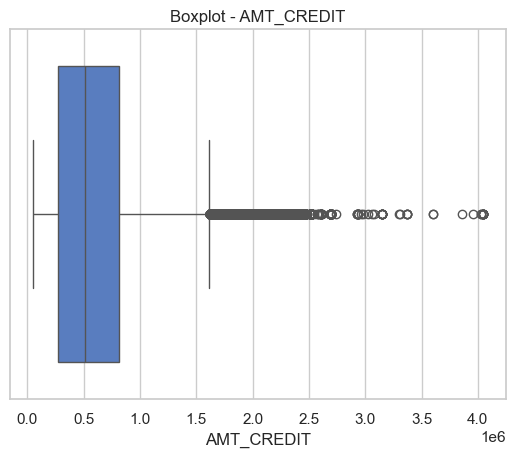

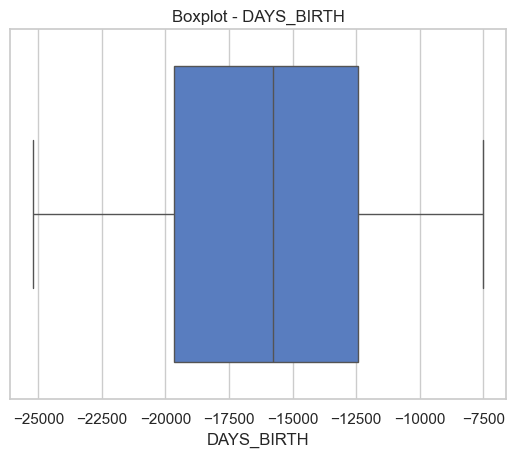

In [11]:
# Visualisation d'outliers pour quelques features numériques
import scipy.stats as stats
for col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH']:
    plt.figure()
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot - {col}')
    plt.show()


In [12]:
# Suppression des outliers sur AMT_INCOME_TOTAL (exemple: au-delà de 99e percentile)
q_hi = train['AMT_INCOME_TOTAL'].quantile(0.99)
train = train[train['AMT_INCOME_TOTAL'] < q_hi]
print('Taille après suppression outliers :', train.shape)


Taille après suppression outliers : (304417, 122)


## 7. Suppression/Imputation des valeurs manquantes

In [13]:
# Suppression des colonnes avec >30% de valeurs manquantes
thresh = 0.3
to_drop = missing[missing > thresh].index.tolist()
print(f"Colonnes supprimées : {to_drop}")
train = train.drop(columns=to_drop)

# Imputation simple
for col in train.select_dtypes(include='number'):
    train[col].fillna(train[col].median(), inplace=True)
for col in train.select_dtypes(include='object'):
    train[col].fillna('MISSING', inplace=True)


Colonnes supprimées : ['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE'

/var/folders/6t/_4tfp3815r5g5lb0qm81sjcr0000gn/T/ipykernel_715/3667239496.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)
/var/folders/6t/_4tfp3815r5g5lb0qm81sjcr0000gn/T/ipykernel_715/3667239496.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

## 8. Détection et suppression des doublons

In [14]:
avant = train.shape[0]
train = train.drop_duplicates()
print(f"Doublons supprimés : {avant - train.shape[0]}")


Doublons supprimés : 0


## 9. Vérification finale du dataset

In [15]:
print(train.shape)
display(train.head())
display(train.info())


(304417, 72)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 304417 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   304417 non-null  int64  
 1   TARGET                       304417 non-null  int64  
 2   NAME_CONTRACT_TYPE           304417 non-null  object 
 3   CODE_GENDER                  304417 non-null  object 
 4   FLAG_OWN_CAR                 304417 non-null  object 
 5   FLAG_OWN_REALTY              304417 non-null  object 
 6   CNT_CHILDREN                 304417 non-null  int64  
 7   AMT_INCOME_TOTAL             304417 non-null  float64
 8   AMT_CREDIT                   304417 non-null  float64
 9   AMT_ANNUITY                  304417 non-null  float64
 10  AMT_GOODS_PRICE              304417 non-null  float64
 11  NAME_TYPE_SUITE              304417 non-null  object 
 12  NAME_INCOME_TYPE             304417 non-null  object 
 13  NAME

None

## 10. Encodage & normalisation des features

In [16]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encodage des variables catégorielles
for col in train.select_dtypes(include='object'):
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))

# Normalisation des variables numériques
scaler = StandardScaler()
num_cols = train.select_dtypes(include=np.number).columns
train[num_cols] = scaler.fit_transform(train[num_cols])

print("Encodage et normalisation terminés !")


Encodage et normalisation terminés !


## Sélection des features les plus importantes

Dans cette étape, nous allons estimer l'importance des variables (features) par rapport à la variable cible. Cela permet d’identifier les variables les plus informatives pour la modélisation, et éventuellement de réduire la dimensionnalité des données.


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Définir X et y (features et cible)
X = application_train_clean.drop(columns=['TARGET'])
y = application_train_clean['TARGET']

# Entraînement du modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X, y)

# Récupérer et trier l'importance des features
importances = rf.feature_importances_
features = X.columns
feat_importances = pd.DataFrame({'feature': features, 'importance': importances})
feat_importances = feat_importances.sort_values(by='importance', ascending=False)

# Afficher les 20 plus importantes
feat_importances.head(20)


NameError: name 'application_train_clean' is not defined